Author: Susan Hopper

## Data Vis for accidental death categories

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Read in the data
df = pd.read_csv('../1_data/accidental_death_topics.csv')
df = df[df['age']<200]
df.sample(5)

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,...,death_date,death_time,death_day,inc_date,inc_time,inc_day,long_topic,best_topic_num,best_topic_name,best_topic_perc
11829,2020-05-11 03:22:00,2020-05-11 03:30:00,57.0,0,Black,0,ACCIDENT,"COMBINED COCAINE, DESPROPIONYL FENTANYL, FENTA...","COMBINED COCAINE, DESPROPIONYL FENTANYL, FENTA...",no_text,...,2020-05-11,03:30:00,Monday,2020-05-11,03:22:00,Monday,NaN,NaN,NaN,NaN
5168,2022-03-28 10:40:00,2022-03-28 11:40:00,21.0,0,Black,0,ACCIDENT,"COMBINED DRUG (OXYCODONE, PROMETHAZINE AND BRO...","COMBINED DRUG (OXYCODONE, PROMETHAZINE AND BRO...",no_text,...,2022-03-28,11:40:00,Monday,2022-03-28,10:40:00,Monday,NaN,NaN,NaN,NaN
2524,2022-12-18 15:37:00,2022-12-18 15:58:00,50.0,0,Black,0,ACCIDENT,COLD EXPOSURE,COLD EXPOSURE,no_text,...,2022-12-18,15:58:00,Sunday,2022-12-18,15:37:00,Sunday,NaN,NaN,NaN,NaN
17593,2017-11-02 00:00:00,2018-02-12 05:26:00,33.0,0,Black,0,ACCIDENT,COMPLICATIONS OF MULTIPLE INJURIES. PEDESTRIAN...,COMPLICATIONS OF MULTIPLE INJURIES,PEDESTRIAN STRUCK BY MOTOR VEHICLE,...,2018-02-12,05:26:00,Monday,2017-11-02,00:00:00,Thursday,"[(0, 0.7505441), (1, 0.22558607), (2, 0.023869...",0.0,vehicle_collision,0.750550
18756,2017-09-12 06:00:00,2017-09-12 08:32:00,82.0,0,White,0,ACCIDENT,SPINAL INJURY. FALL DOWN STAIRS. ETHANOL INTOX...,SPINAL INJURY,FALL DOWN STAIRS,...,2017-09-12,08:32:00,Tuesday,2017-09-12,06:00:00,Tuesday,"[(0, 0.44654122), (1, 0.524755), (2, 0.0287038...",1.0,fall,0.524734


In [44]:
df.shape

(24979, 36)

In [4]:
df.columns

Index(['date_of_incident', 'date_of_death', 'age', 'gender', 'race', 'latino',
       'manner_of_death', 'primary_cause', 'primary_cause_line_a',
       'primary_cause_line_b', 'primary_cause_line_c', 'secondary_cause',
       'gun_related', 'opioid_related', 'cold_related', 'heat_related',
       'commissioner_district', 'incident_city', 'incident_zip_code',
       'longitude', 'latitude', 'residence_city', 'residence_zip',
       'chicago_community_area', 'covid_related', 'age_range', 'death_date',
       'death_time', 'death_day', 'inc_date', 'inc_time', 'inc_day',
       'long_topic', 'best_topic_num', 'best_topic_name', 'best_topic_perc'],
      dtype='object')

In [55]:
# Create dfs for the six classes of accidental death we've identified
gun = df[df['gun_related']==1].dropna(subset=['inc_date'])
drug = df[df['opioid_related']==1].dropna(subset=['inc_date'])
cold = df[df['cold_related']==1].dropna(subset=['inc_date'])
heat = df[df['heat_related']==1].dropna(subset=['inc_date'])
crash = df[df['best_topic_num']==0].dropna(subset=['inc_date'])
fall = df[df['best_topic_num']==1].dropna(subset=['inc_date'])
choke = df[df['best_topic_num']==2].dropna(subset=['inc_date'])

In [36]:
gun.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,12.000000,12.000000,12.000000,12.0,12.0,12.0,12.0,12.000000,12.000000,12.0,0.0,0.0
mean,32.916667,0.083333,0.083333,1.0,0.0,0.0,0.0,-87.618076,41.721940,0.0,NaN,NaN
std,21.618419,0.288675,0.288675,0.0,0.0,0.0,0.0,0.215832,0.192945,0.0,NaN,NaN
min,2.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,-87.893199,41.310000,0.0,NaN,NaN
25%,19.750000,0.000000,0.000000,1.0,0.0,0.0,0.0,-87.685991,41.612578,0.0,NaN,NaN
50%,32.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,-87.627888,41.775129,0.0,NaN,NaN
75%,51.500000,0.000000,0.000000,1.0,0.0,0.0,0.0,-87.585623,41.829534,0.0,NaN,NaN
max,70.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,-87.020000,42.051192,0.0,NaN,NaN


''

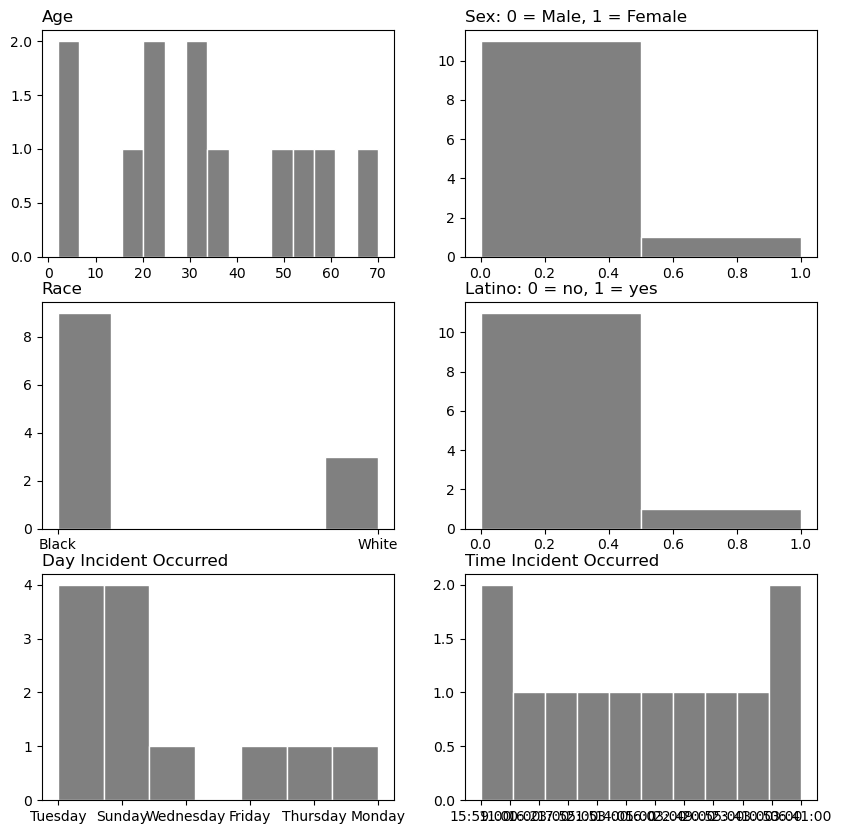

In [37]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(gun['age'], color='grey', edgecolor='white', bins=15)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(gun['gender'], color='grey', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(gun['race'], color='grey', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(gun['latino'], color='grey', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(gun['inc_day'], color='grey', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(gun['inc_time'], color='grey', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;

In [46]:
# drug.sample(10)

In [47]:
drug.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,12215.000000,12215.000000,12215.000000,12215.0,12215.0,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,0.0,0.0
mean,45.633893,0.233975,0.132051,0.0,1.0,0.011953,0.000246,-86.714606,41.360883,0.002865,NaN,NaN
std,13.166362,0.423374,0.338560,0.0,0.0,0.108677,0.015670,9.338563,4.456686,0.053454,NaN,NaN
min,2.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,-97.690000,0.000000,0.000000,NaN,NaN
25%,35.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,-87.758552,41.761675,0.000000,NaN,NaN
50%,47.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,-87.705269,41.866660,0.000000,NaN,NaN
75%,56.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,-87.646757,41.904091,0.000000,NaN,NaN
max,86.000000,1.000000,1.000000,0.0,1.0,1.000000,1.000000,0.000000,42.390000,1.000000,NaN,NaN


''

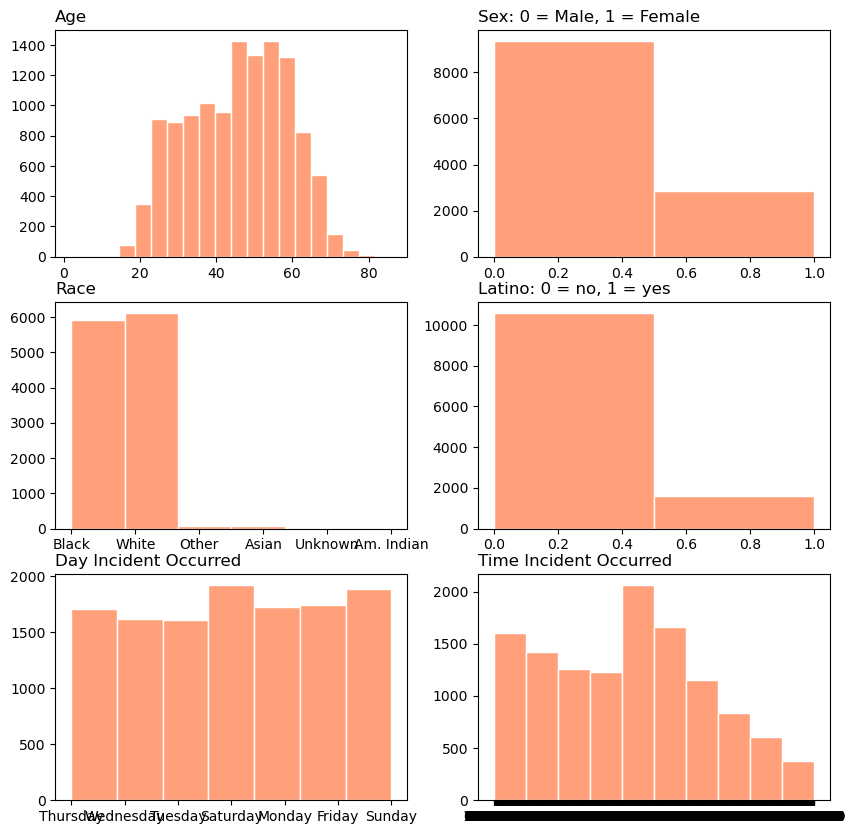

In [49]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(drug['age'], color='lightsalmon', edgecolor='white', bins=20)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(drug['gender'], color='lightsalmon', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(drug['race'], color='lightsalmon', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(drug['latino'], color='lightsalmon', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(drug['inc_day'], color='lightsalmon', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(drug['inc_time'], color='lightsalmon', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;

In [51]:
cold.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,510.000000,510.000000,510.000000,510.0,510.000000,510.0,510.0,510.000000,510.000000,510.000000,0.0,0.0
mean,56.215686,0.200000,0.125490,0.0,0.290196,1.0,0.0,-87.030183,41.517224,0.011765,NaN,NaN
std,15.856569,0.400393,0.331599,0.0,0.454298,0.0,0.0,7.746169,3.697104,0.107931,NaN,NaN
min,12.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,-88.263178,0.000000,0.000000,NaN,NaN
25%,46.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,-87.754421,41.771845,0.000000,NaN,NaN
50%,56.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,-87.702604,41.871710,0.000000,NaN,NaN
75%,66.000000,0.000000,0.000000,0.0,1.000000,1.0,0.0,-87.648262,41.924430,0.000000,NaN,NaN
max,99.000000,1.000000,1.000000,0.0,1.000000,1.0,0.0,0.000000,42.180000,1.000000,NaN,NaN


''

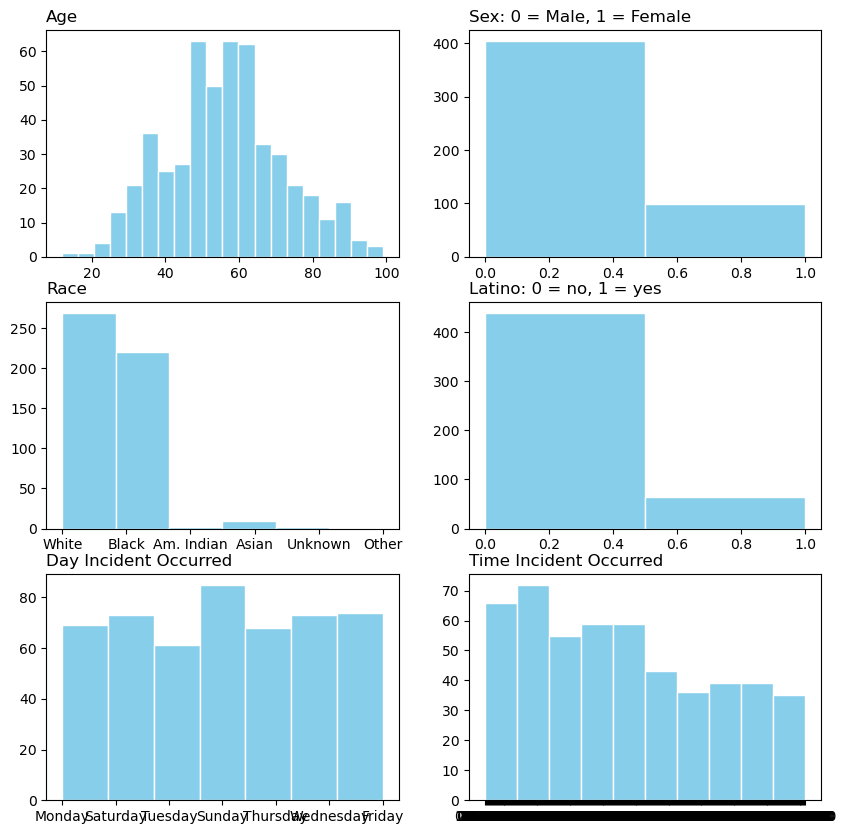

In [58]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(cold['age'], color='skyblue', edgecolor='white', bins=20)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(cold['gender'], color='skyblue', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(cold['race'], color='skyblue', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(cold['latino'], color='skyblue', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(cold['inc_day'], color='skyblue', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(cold['inc_time'], color='skyblue', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;

In [59]:
heat.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,25.00000,25.0,25.000000,25.0,25.000000,25.0,25.0,25.000000,25.000000,25.0,0.0,0.0
mean,60.68000,0.6,0.080000,0.0,0.120000,0.0,1.0,-87.705607,41.826417,0.0,NaN,NaN
std,19.01254,0.5,0.276887,0.0,0.331662,0.0,0.0,0.069841,0.153046,0.0,NaN,NaN
min,18.00000,0.0,0.000000,0.0,0.000000,0.0,1.0,-87.851371,41.477633,0.0,NaN,NaN
25%,54.00000,0.0,0.000000,0.0,0.000000,0.0,1.0,-87.732373,41.743524,0.0,NaN,NaN
50%,61.00000,1.0,0.000000,0.0,0.000000,0.0,1.0,-87.701834,41.876300,0.0,NaN,NaN
75%,76.00000,1.0,0.000000,0.0,0.000000,0.0,1.0,-87.659969,41.937692,0.0,NaN,NaN
max,95.00000,1.0,1.000000,0.0,1.000000,0.0,1.0,-87.587391,42.017340,0.0,NaN,NaN


''

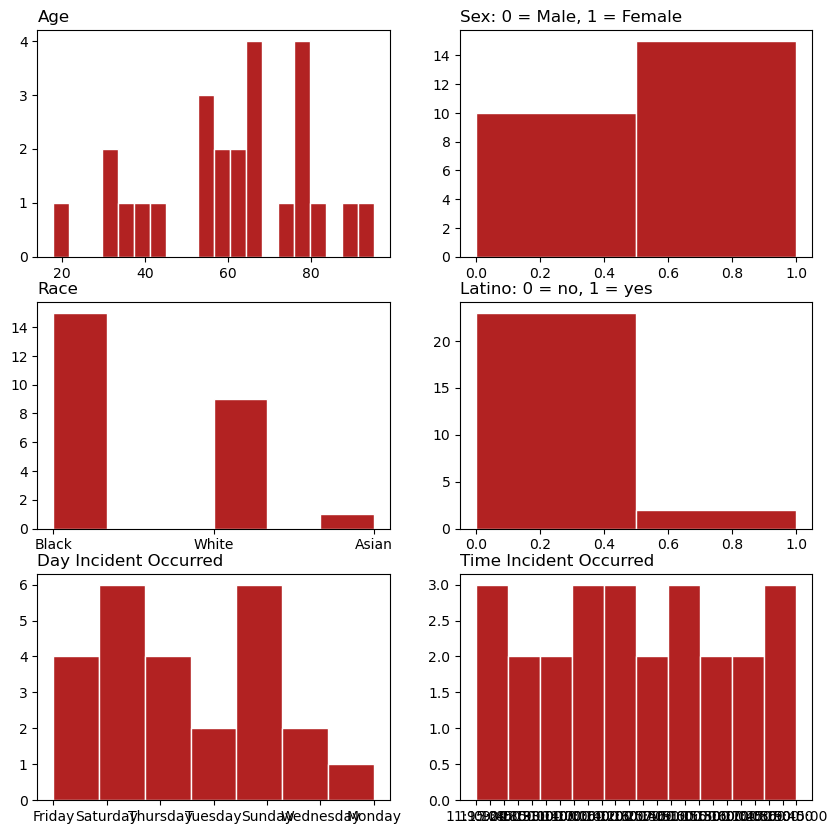

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(heat['age'], color='firebrick', edgecolor='white', bins=20)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(heat['gender'], color='firebrick', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(heat['race'], color='firebrick', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(heat['latino'], color='firebrick', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(heat['inc_day'], color='firebrick', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(heat['inc_time'], color='firebrick', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;

In [61]:
crash.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,5497.000000,5497.000000,5497.000000,5497.0,5497.0,5497.0,5497.0,5497.000000,5497.000000,5497.000000,5497.0,5497.000000
mean,52.215390,0.310897,0.161906,0.0,0.0,0.0,0.0,-85.500069,40.741907,0.004912,0.0,0.769634
std,23.677844,0.462903,0.368399,0.0,0.0,0.0,0.0,13.878657,6.615337,0.069918,0.0,0.146167
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-96.050000,0.000000,0.000000,0.0,0.350978
25%,32.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-87.820000,41.690000,0.000000,0.0,0.676645
50%,53.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-87.720000,41.830000,0.000000,0.0,0.821521
75%,71.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,-87.643052,41.946635,0.000000,0.0,0.892911
max,105.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,44.540000,1.000000,0.0,0.946783


''

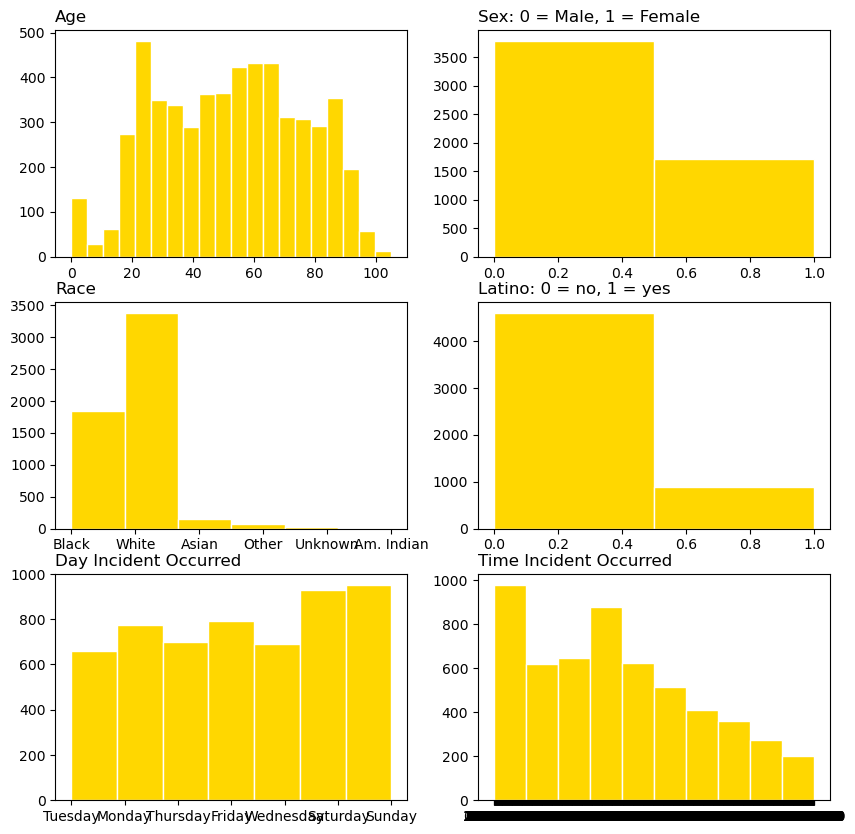

In [63]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(crash['age'], color='gold', edgecolor='white', bins=20)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(crash['gender'], color='gold', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(crash['race'], color='gold', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(crash['latino'], color='gold', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(crash['inc_day'], color='gold', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(crash['inc_time'], color='gold', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;

In [64]:
fall.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,5093.000000,5093.000000,5093.000000,5093.0,5093.0,5093.0,5093.0,5093.000000,5093.000000,5093.000000,5093.0,5093.000000
mean,66.773611,0.385431,0.101119,0.0,0.0,0.0,0.0,-85.270328,40.661347,0.022776,1.0,0.751171
std,21.784725,0.486745,0.301516,0.0,0.0,0.0,0.0,14.601356,6.965395,0.149204,0.0,0.132412
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-95.350000,0.000000,0.000000,1.0,0.365318
25%,52.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-87.839380,41.730548,0.000000,1.0,0.711800
50%,71.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-87.732577,41.873784,0.000000,1.0,0.809373
75%,85.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,-87.656729,41.981912,0.000000,1.0,0.857757
max,107.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,43.060000,1.000000,1.0,0.943419


''

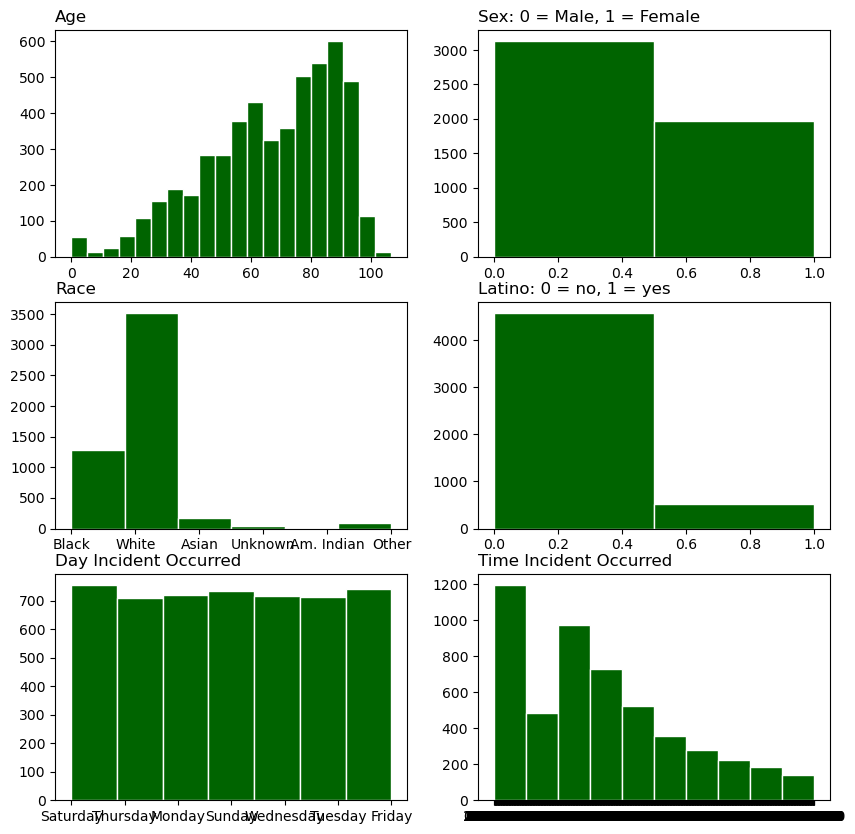

In [66]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(fall['age'], color='darkgreen', edgecolor='white', bins=20)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(fall['gender'], color='darkgreen', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(fall['race'], color='darkgreen', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(fall['latino'], color='darkgreen', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(fall['inc_day'], color='darkgreen', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(fall['inc_time'], color='darkgreen', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;

In [67]:
choke.describe()

,age,gender,latino,gun_related,opioid_related,cold_related,heat_related,longitude,latitude,covid_related,best_topic_num,best_topic_perc
count,1420.000000,1420.000000,1420.000000,1420.0,1420.0,1420.0,1420.0,1420.000000,1420.000000,1420.000000,1420.0,1420.000000
mean,55.946479,0.302817,0.123944,0.0,0.0,0.0,0.0,-86.255313,41.138093,0.031690,2.0,0.644475
std,20.551109,0.459639,0.329633,0.0,0.0,0.0,0.0,11.315360,5.399169,0.175236,0.0,0.105363
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-89.410000,0.000000,0.000000,2.0,0.371996
25%,44.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-87.800181,41.736186,0.000000,2.0,0.587435
50%,57.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-87.702522,41.850366,0.000000,2.0,0.587505
75%,69.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,-87.640841,41.960000,0.000000,2.0,0.727630
max,102.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,45.630000,1.000000,2.0,0.941226


''

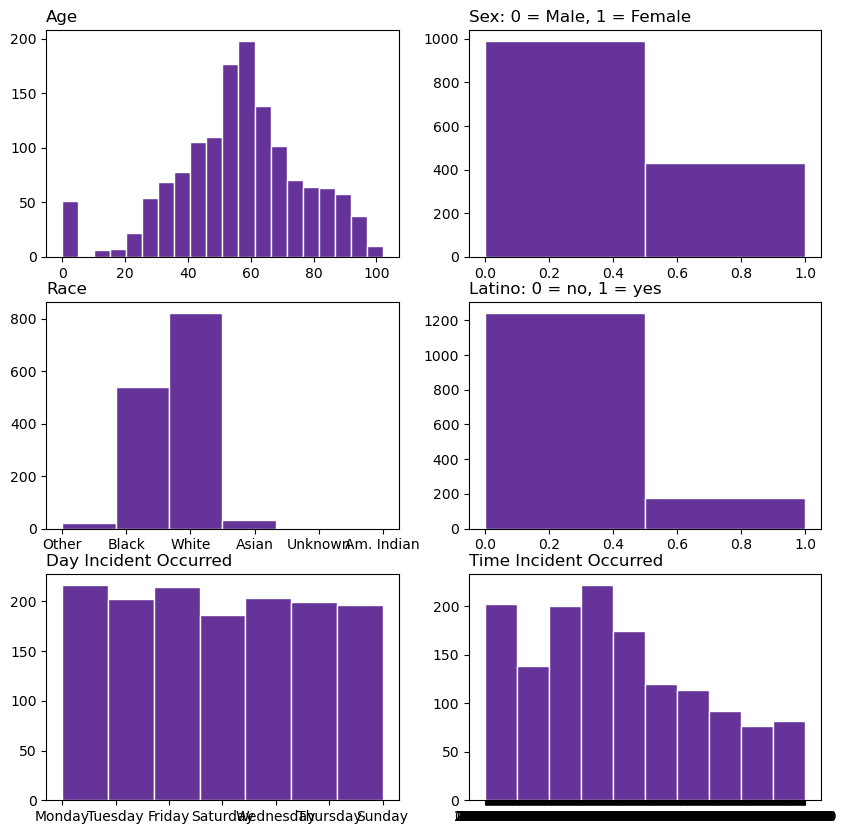

In [69]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0][0].hist(choke['age'], color='rebeccapurple', edgecolor='white', bins=20)
axs[0][0].set_title('Age', loc='left')
axs[0][1].hist(choke['gender'], color='rebeccapurple', edgecolor='white', bins=2)
axs[0][1].set_title('Sex: 0 = Male, 1 = Female', loc='left')
axs[1][0].hist(choke['race'], color='rebeccapurple', edgecolor='white', bins=6)
axs[1][0].set_title('Race', loc='left')
axs[1][1].hist(choke['latino'], color='rebeccapurple', edgecolor='white', bins=2)
axs[1][1].set_title('Latino: 0 = no, 1 = yes', loc='left')
axs[2][0].hist(choke['inc_day'], color='rebeccapurple', edgecolor='white', bins=7)
axs[2][0].set_title('Day Incident Occurred', loc='left')
axs[2][1].hist(choke['inc_time'], color='rebeccapurple', edgecolor='white')
axs[2][1].set_title('Time Incident Occurred', loc='left')
;